In [1]:
%matplotlib inline

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p style = "font-size: 27px; text-align: right; color: darkturquoise" > Weather Data

<p style = "font-size: 15px; text-align: right; color: darkturquoise" > August 2024, written by Irina Nedyalkova

In [3]:
WEATHER_DATA = pd.read_csv("weather_data.csv")

In [4]:
WEATHER_DATA.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

- First, I take a look at the data.
- Second, I wrap it in a global variable (capital letters).
- Third, I see what columns do we have...
- For this project, I decide to drop some of the columns and work with just 4 of them.

In [5]:
df_weather = WEATHER_DATA.drop(axis = 1, columns = ["Dew Point Temp_C", "Rel Hum_%", "Visibility_km", "Press_kPa"]) 

I make a new dataframe. Here comes the importance of the global variable. Always know which your original dataframe is!

In [6]:
date_time = df_weather["Date/Time"]                                       # original Date/Time column

df_DT = pd.DataFrame(date_time)

I prefer to have clarity and take out just the column I want to split, the "Date/Time" column. 

In [7]:
date = pd.to_datetime(df_DT["Date/Time"]).dt.date                      # split to Date column

just_dates = pd.DataFrame(date)                                     

In [8]:
time = pd.to_datetime(df_DT["Date/Time"]).dt.time                    # split to Time column

just_time = pd.DataFrame(time)                                     

I keep the variables closed, because GitHub shows them in Large, and the data takes up too much space.

In [9]:
date_column = just_dates.rename(columns = {"Date/Time": "Date"})

In [10]:
time_column = just_time.rename(columns = {"Date/Time": "Time"})

Above, renamed the columns just as $Date$ and $Time$.

In [11]:
working_df = df_weather.drop(axis = 1, columns = "Date/Time")

I create, check for accuracy and wrap the data in a variable then.

In [12]:
working_df.insert(0, "Date", value = date_column)
working_df.insert(1, "Time", value = time_column)

In [13]:
#working_df

In [14]:
working_df.columns

Index(['Date', 'Time', 'Temp_C', 'Wind Speed_km/h', 'Weather'], dtype='object')

> Voila! My new DataFrame, which I will be working with, is ready! It has 5 columns and 8784 rows.

In [15]:
lowest_temp = working_df.nsmallest(11, "Temp_C")

In [16]:
lowest_temp.shape

(11, 5)

In [17]:
lowest_temp_wind = lowest_temp["Wind Speed_km/h"]

In [18]:
temp_at_lowest = lowest_temp["Temp_C"]

The lowest temperature is on 15.01.2012 with $11$ entries. Below, you see the visual presentation:

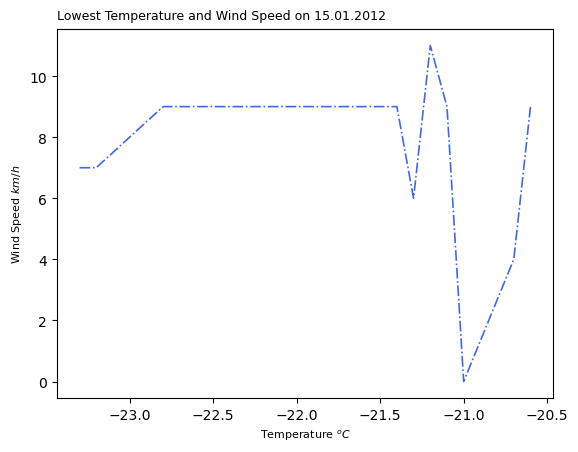

In [19]:
plt.plot(temp_at_lowest, lowest_temp_wind, linestyle = "dashdot", lw = 1.2, color = "royalblue")

plt.xlabel("Temperature $^{o}C$", size = 8)
plt.ylabel("Wind Speed $km/h$", size = 8)
plt.title("Lowest Temperature and Wind Speed on 15.01.2012", size = 9, pad = 7, loc = "left")

plt.show()

There are $68$ entries for temperature above 30$^{o}C$ on different days.

In [20]:
df_heat = working_df[(working_df["Temp_C"] >= 30)]

In [21]:
heat_temp = df_heat["Temp_C"]

Checking min / max and mean:

In [22]:
[heat_temp.min(), heat_temp.max(), heat_temp.mean()]     # grad C

[30.0, 33.0, 31.217647058823527]

In [23]:
heat_wind = df_heat["Wind Speed_km/h"]

Checking min / max and mean value of the wind during the most high temperatures:

In [24]:
[heat_wind.min(), heat_wind.max(), heat_wind.mean()]        # km/h

[4, 32, 18.0]

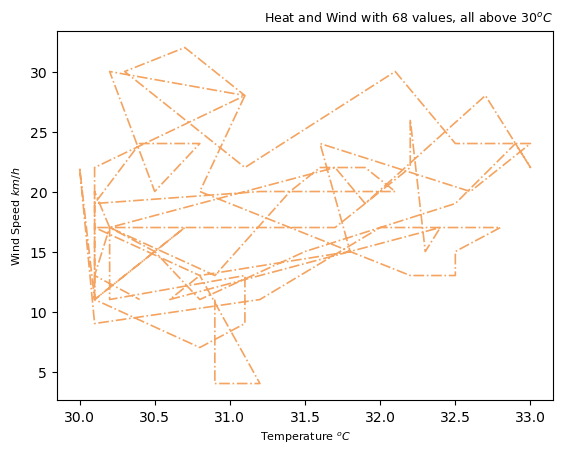

In [25]:
plt.plot(heat_temp, heat_wind, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

plt.xlabel("Temperature $^{o}C$", size = 8)
plt.ylabel("Wind Speed $km/h$", size = 8)
plt.title("Heat and Wind with 68 values, all above 30$^{o}C$", size = 9, pad = 7, loc = "right")

plt.show()

Uh! A lot going on here :) Let's zoom in and test with less values:

In [26]:
heat_temp_first11 = heat_temp.head(11)
heat_wind_first11 = heat_wind.head(11)

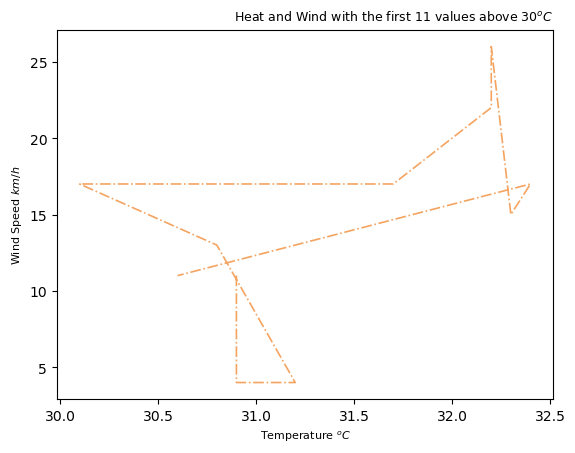

In [27]:
plt.plot(heat_temp_first11, heat_wind_first11, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

plt.xlabel("Temperature $^{o}C$", size = 8)
plt.ylabel("Wind Speed $km/h$", size = 8)
plt.title("Heat and Wind with the first 11 values above 30$^{o}C$", size = 9, pad = 7, loc = "right")

plt.show()

In [28]:
[heat_temp_first11.min(), heat_temp_first11.max()]                  # I always do some check if my chart is correct

[30.1, 32.4]

In [29]:
[heat_wind_first11.min(), heat_wind_first11.max()]                 # I always do some check if my chart is correct

[4, 26]

Test with the last 11 values:

In [30]:
heat_temp_last11 = heat_temp.tail(11)
heat_wind_last11 = heat_wind.tail(11)

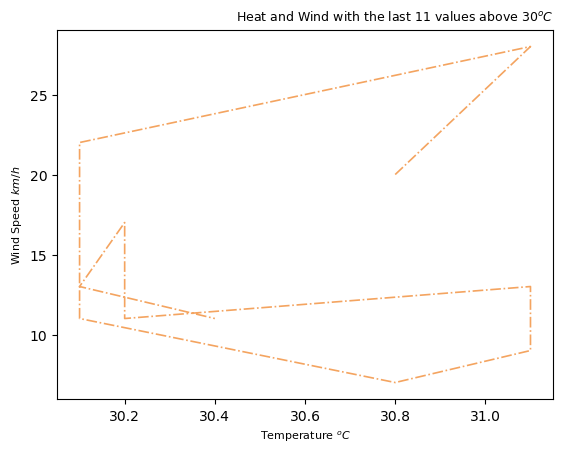

In [31]:
plt.plot(heat_temp_last11, heat_wind_last11, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

plt.xlabel("Temperature $^{o}C$", size = 8)
plt.ylabel("Wind Speed $km/h$", size = 8)
plt.title("Heat and Wind with the last 11 values above 30$^{o}C$", size = 9, pad = 7, loc = "right")

plt.show()

Test with 11 sample values:

In [32]:
heat_temp_sample11 = heat_temp.sample(11)
heat_wind_sample11 = heat_wind.sample(11)

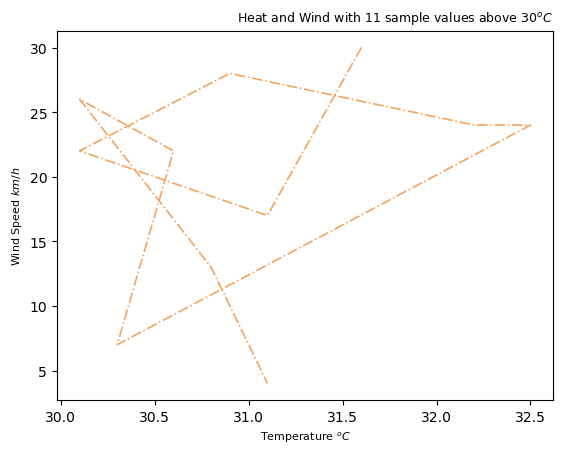

In [33]:
plt.plot(heat_temp_sample11, heat_wind_sample11, linestyle = "dashdot", lw = 1.2, color = "sandybrown")

plt.xlabel("Temperature $^{o}C$", size = 8)
plt.ylabel("Wind Speed $km/h$", size = 8)
plt.title("Heat and Wind with 11 sample values above 30$^{o}C$", size = 9, pad = 7, loc = "right")

plt.show()

Okay, arranged all heat together:

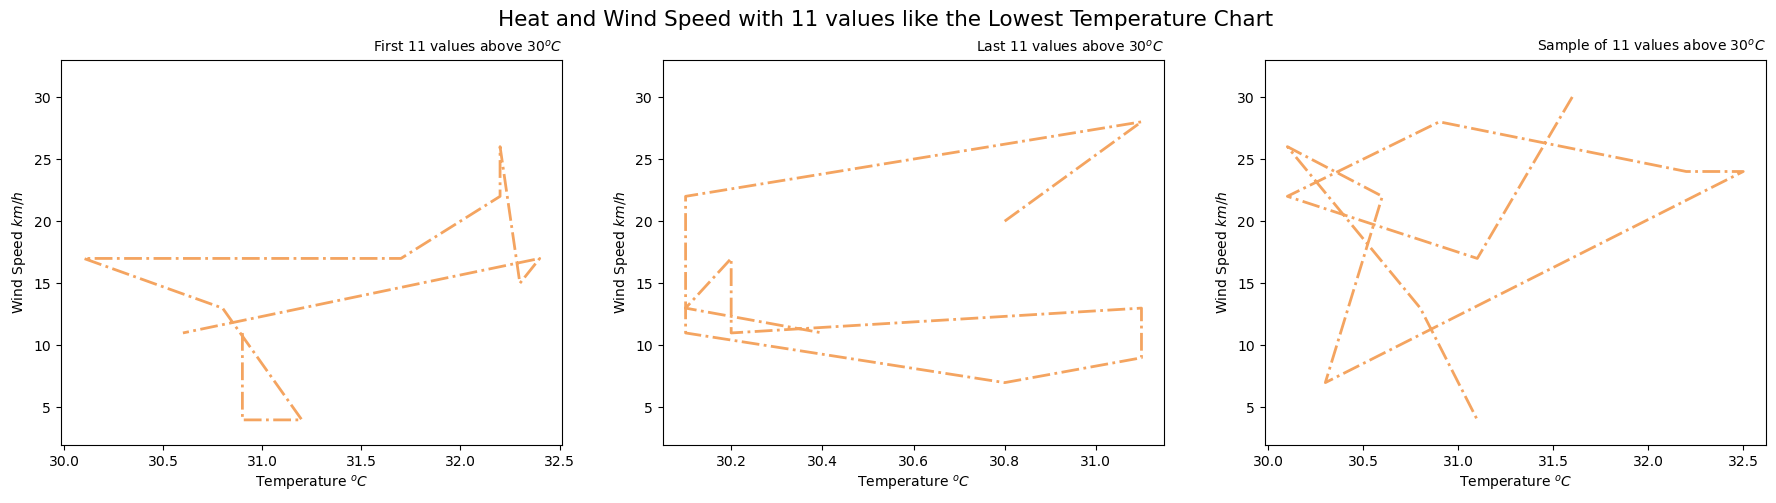

In [34]:
rows = 1 
columns = 3
plt.figure(figsize = (22, 5))
#plt.subplots_adjust(top = 1.7, right = 1.5)
fig = plt.gcf()
fig.suptitle("Heat and Wind Speed with 11 values like the Lowest Temperature Chart", size = 15.5)

plt.subplot(rows, columns, 1)
plt.plot(heat_temp_first11, heat_wind_first11, linestyle = "dashdot", lw = 2, color = "sandybrown")
plt.ylim(2, 33)
plt.xlabel("Temperature $^{o}C$", size = 10)
plt.ylabel("Wind Speed $km/h$", size = 10)
plt.title("First 11 values above 30$^{o}C$", size = 10, loc = "right")

plt.subplot(rows, columns, 2)
plt.plot(heat_temp_last11, heat_wind_last11, linestyle = "dashdot", lw = 2, color = "sandybrown")
plt.ylim(2, 33)
plt.xlabel("Temperature $^{o}C$", size = 10)
plt.ylabel("Wind Speed $km/h$", size = 10)
plt.title("Last 11 values above 30$^{o}C$", size = 10, loc = "right")

plt.subplot(rows, columns, 3)
plt.plot(heat_temp_sample11, heat_wind_sample11, linestyle = "dashdot", lw = 2, color = "sandybrown")
plt.ylim(2, 33)
plt.xlabel("Temperature $^{o}C$", size = 10)
plt.ylabel("Wind Speed $km/h$", size = 10)
plt.title("Sample of 11 values above 30$^{o}C$", size = 10, loc = "right")

plt.show()

I guess, this is how Wind moves. The sample values are more chaotic. Let place the first two and the lowest temperature chart together:

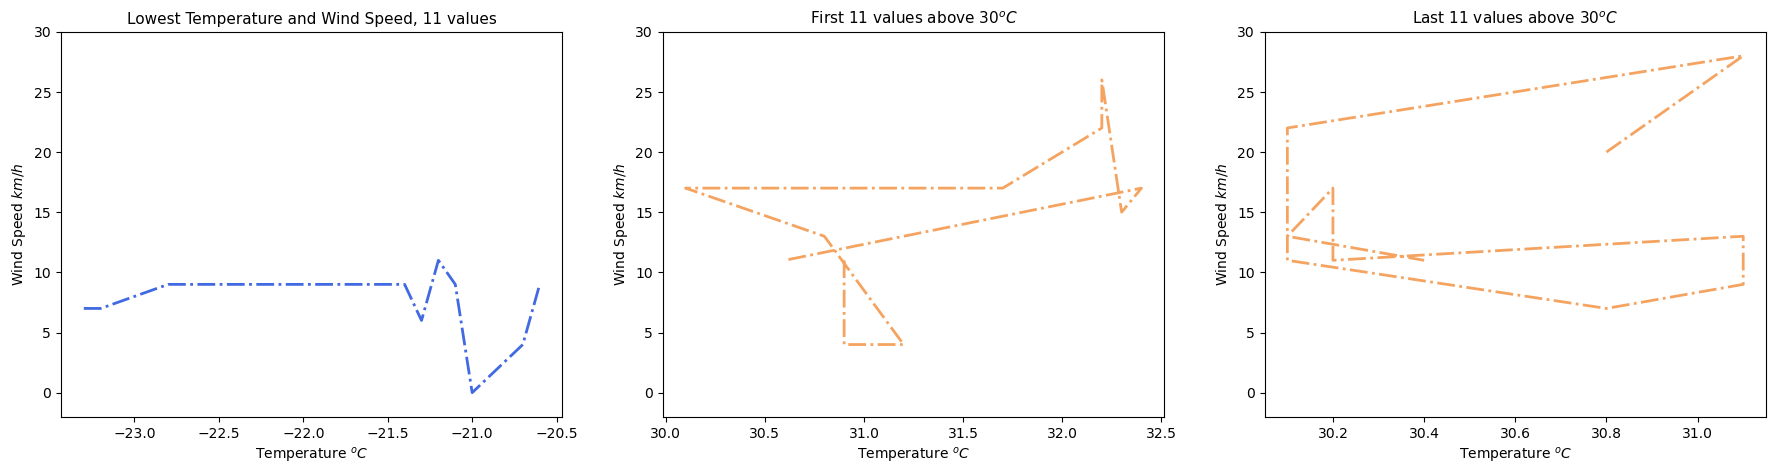

In [35]:
rows = 1 
columns = 3
plt.figure(figsize = (22, 5))

plt.subplot(rows, columns, 1)
plt.plot(temp_at_lowest, lowest_temp_wind, linestyle = "dashdot", lw = 2, color = "royalblue")
plt.ylim(-2, 30)
plt.xlabel("Temperature $^{o}C$", size = 10)
plt.ylabel("Wind Speed $km/h$", size = 10)
plt.title("Lowest Temperature and Wind Speed, 11 values", size = 11)

plt.subplot(rows, columns, 2)
plt.plot(heat_temp_first11, heat_wind_first11, linestyle = "dashdot", lw = 2, color = "sandybrown")
plt.ylim(-2, 30)
plt.xlabel("Temperature $^{o}C$", size = 10)
plt.ylabel("Wind Speed $km/h$", size = 10)
plt.title("First 11 values above 30$^{o}C$", size = 11)

plt.subplot(rows, columns, 3)
plt.plot(heat_temp_last11, heat_wind_last11, linestyle = "dashdot", lw = 2, color = "sandybrown")
plt.ylim(-2, 30)
plt.xlabel("Temperature $^{o}C$", size = 10)
plt.ylabel("Wind Speed $km/h$", size = 10)
plt.title("Last 11 values above 30$^{o}C$", size = 11)

plt.show()

This is so amazing! Now I understand because there is no wind in Russia and Siberia! It gets more quite in the low temperatures. 

_____________________________________________________________________________________________________________________________